# Stock Price Prediction and Analysis

In [3]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas.io.data import DataReader
from datetime import datetime
from __future__ import division

C:\Users\ajay\AppData\Local\Enthought\Canopy\User\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [4]:
bank_list = ['GS','JPM','UBS','MS']
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

for stock in bank_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)


In [5]:
GS.describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,185.378406,186.936892,183.531832,185.224741,3375955.776892,183.671722
std,20.469544,20.233965,20.739547,20.496797,1624761.447006,19.721406
min,143.080002,144.410004,139.050003,140.690002,1092700.000000,140.081363
25%,174.489998,176.635002,172.130005,173.924995,2185700.000000,172.877370
50%,188.020004,190.119995,186.259995,187.750000,2932100.000000,186.299821
75%,202.224998,202.875000,200.700005,201.875000,4208450.000000,199.597914
max,216.919998,218.770004,216.639999,218.399994,10252200.000000,215.968596


In [6]:
GS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2015-04-06 to 2016-04-01
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Volume       251 non-null int64
Adj Close    251 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


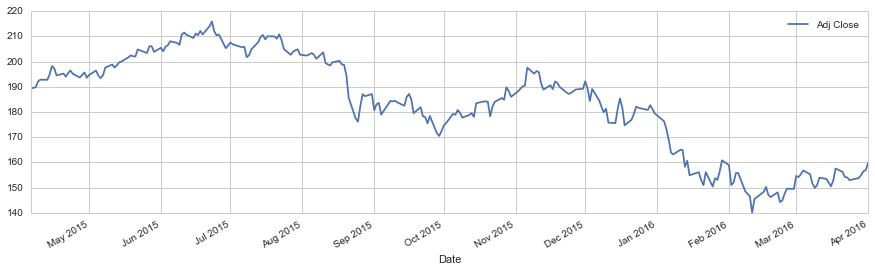

In [7]:
GS['Adj Close'].plot(legend=True,figsize=(15,4))

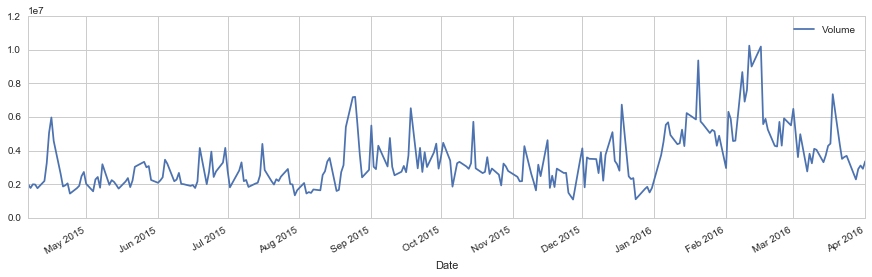

In [8]:
GS.Volume.plot(legend =True, figsize=(15,4))

In [9]:
#The stock was traded most in March 2016

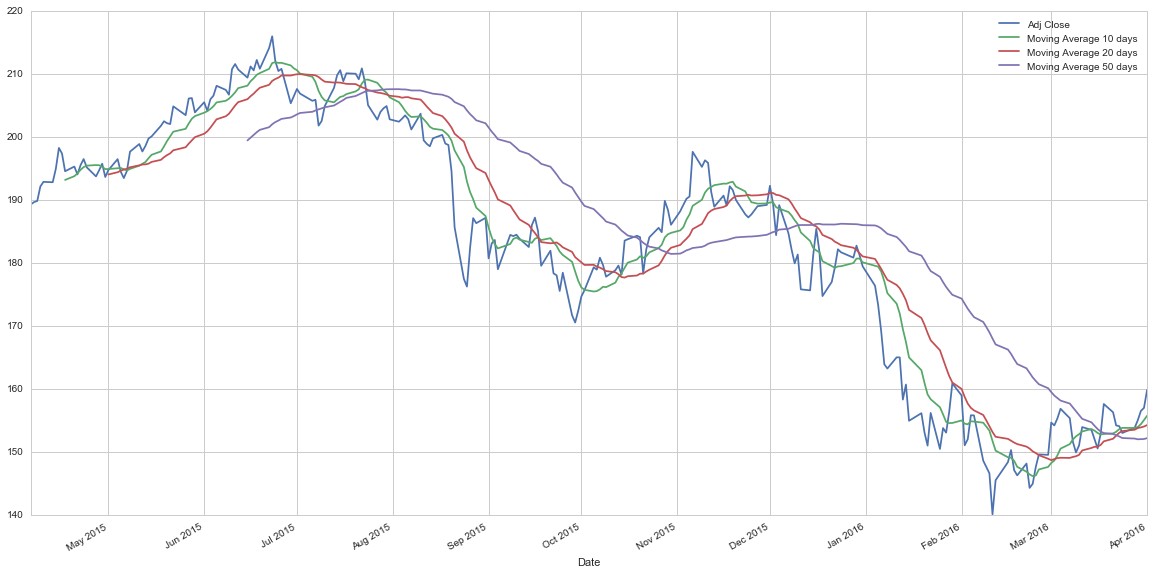

In [14]:
#Moving Averages
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "Moving Average %s days" %(str(ma))
    GS[column_name] = pd.rolling_mean(GS['Adj Close'], ma)
    
GS[['Adj Close','Moving Average 10 days','Moving Average 20 days','Moving Average 50 days']].plot(subplots=False, figsize=(20,10))


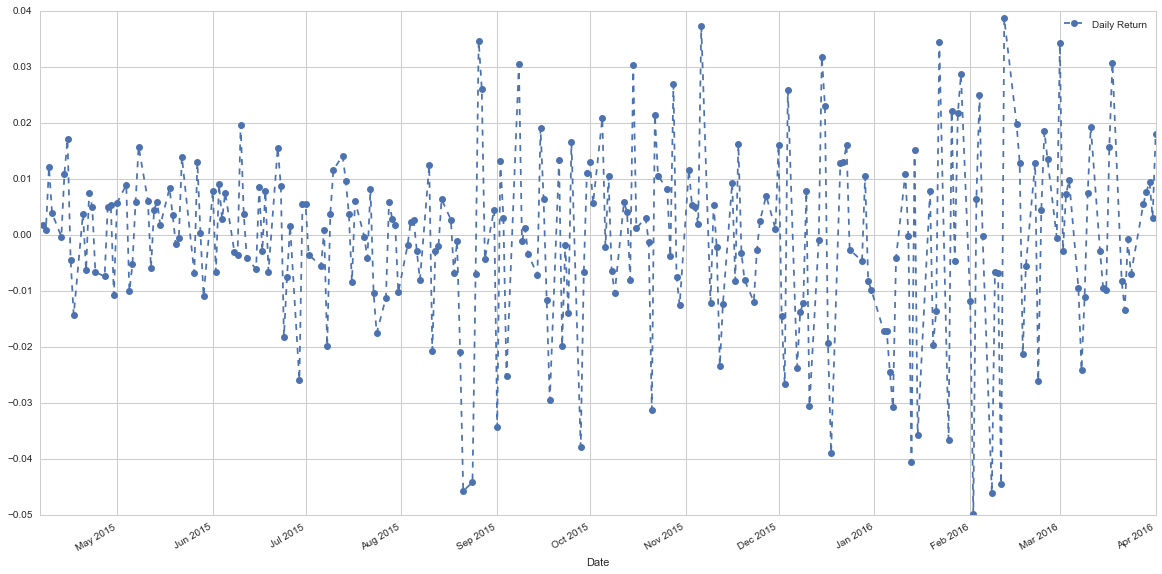

In [17]:
GS['Daily Return'] = GS['Adj Close'].pct_change()
GS['Daily Return'].plot(legend=True, marker = 'o', linestyle='--', figsize=(20,10))

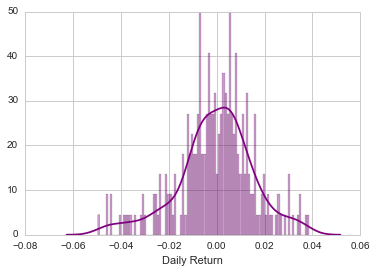

In [20]:
sns.distplot(GS['Daily Return'].dropna(), bins=100, color='purple')

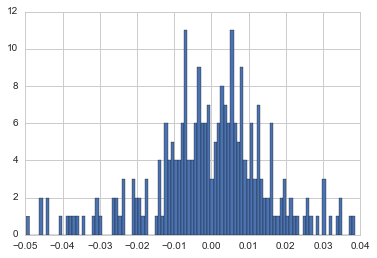

In [21]:
GS['Daily Return'].hist(bins=100)

In [23]:
closing_df = DataReader(bank_list,'yahoo',start,end)['Adj Close']
closing_df.head()

,GS,JPM,MS,UBS
Date,,,,
2015-04-06,189.321490,59.249490,35.253438,18.942207
2015-04-07,189.656656,59.621818,35.282888,18.961705
2015-04-08,189.824239,59.817782,35.597037,18.795973
2015-04-09,192.121138,60.229307,35.970090,18.873964
2015-04-10,192.860483,60.454664,35.577406,18.883714


In [24]:
bank_rets = closing_df.pct_change()
bank_rets.head()

,GS,JPM,MS,UBS
Date,,,,
2015-04-06,NaN,NaN,NaN,NaN
2015-04-07,0.001770,0.006284,0.000835,0.001029
2015-04-08,0.000884,0.003287,0.008904,-0.008740
2015-04-09,0.012100,0.006880,0.010480,0.004149
2015-04-10,0.003848,0.003742,-0.010917,0.000517


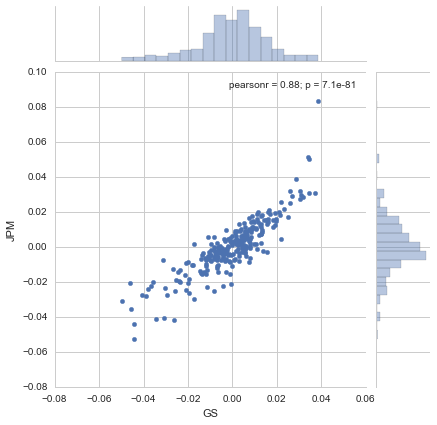

In [32]:
#compare JPM to GS
sns.jointplot('GS','JPM',bank_rets, kind = 'scatter')

In [33]:
bank_rets.head()

,GS,JPM,MS,UBS
Date,,,,
2015-04-06,NaN,NaN,NaN,NaN
2015-04-07,0.001770,0.006284,0.000835,0.001029
2015-04-08,0.000884,0.003287,0.008904,-0.008740
2015-04-09,0.012100,0.006880,0.010480,0.004149
2015-04-10,0.003848,0.003742,-0.010917,0.000517


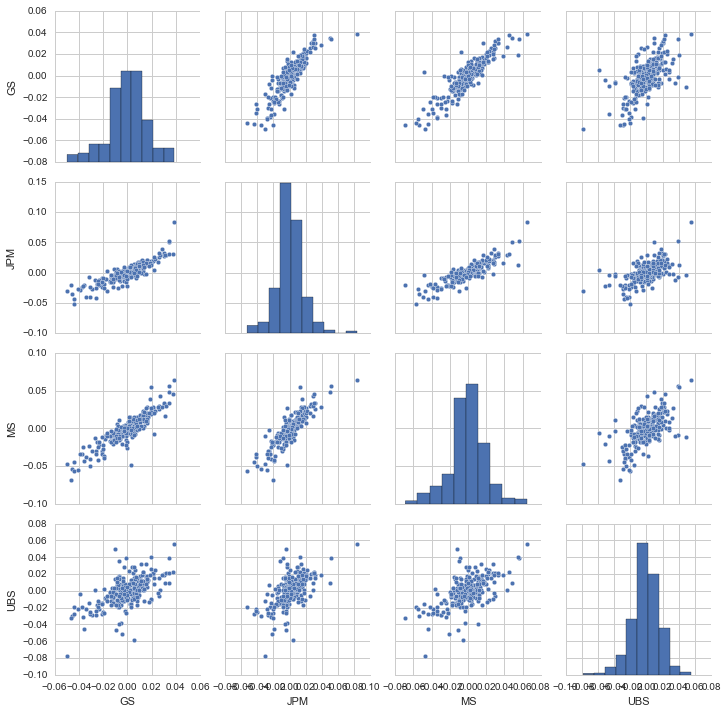

In [36]:
sns.pairplot(bank_rets.dropna())

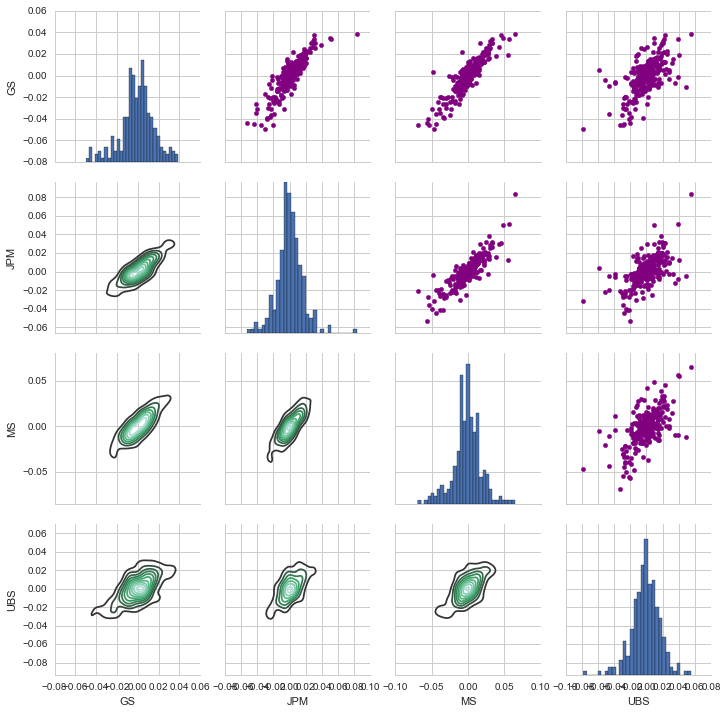

In [39]:
returns_fig = sns.PairGrid(bank_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, color='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

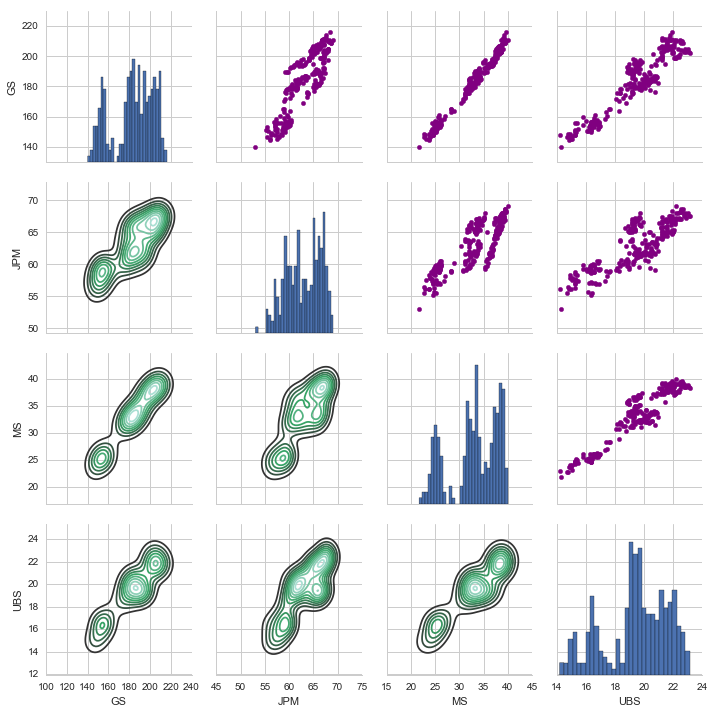

In [40]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, color='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

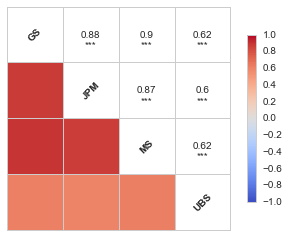

In [43]:
sns.corrplot(bank_rets.dropna(), annot=True)

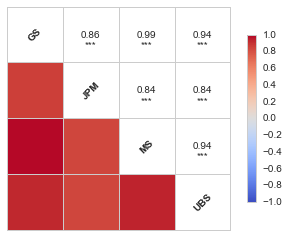

In [44]:
sns.corrplot(closing_df.dropna(), annot=True)

# Quantifying Risk

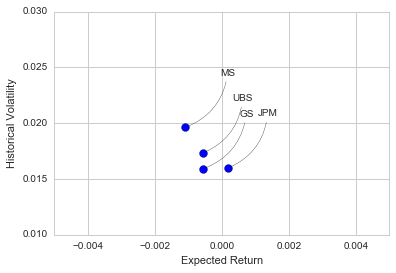

In [51]:
rets = bank_rets.dropna()
area = np.pi * 20
plt.scatter(rets.mean(), rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Historical Volatility')
plt.xlim([-0.005,0.005])
plt.ylim([0.010,0.030])
for label,x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy = (x,y),xytext=(50,50),
    textcoords = 'offset points', ha='right', va='bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle= 'arc3,rad=-0.3'))

# Value at Risk / BootStrap Method

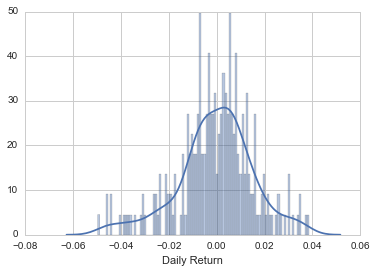

In [53]:
sns.distplot(GS['Daily Return'].dropna(), bins = 100)

In [54]:
rets.head()

,GS,JPM,MS,UBS
Date,,,,
2015-04-07,0.001770,0.006284,0.000835,0.001029
2015-04-08,0.000884,0.003287,0.008904,-0.008740
2015-04-09,0.012100,0.006880,0.010480,0.004149
2015-04-10,0.003848,0.003742,-0.010917,0.000517
2015-04-13,-0.000307,0.005997,0.001656,-0.003614


In [55]:
rets['GS'].quantile(0.05)

-0.030618397743485078

In [56]:
print rets['JPM'].quantile(0.05)
print rets['MS'].quantile(0.05)
print rets['UBS'].quantile(0.05)

-0.0253647292603
-0.0377020192472
-0.0278099747624


# Value at Risk / Monte Carlo Method

In [57]:
days = 365
dt = 1/365
mu = rets.mean()['GS']

sigma = rets.std()['GS']

def monte_carlo(start_price, days, mu, sigma ):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        
        price[x] = price[x-1] + ( price[x-1] * (drift[x] + shock[x]))
        
    return price

In [58]:
GS.head()

,Open,High,Low,Close,Volume,Adj Close,Moving Average 10 days,Moving Average 20 days,Moving Average 50 days,Daily Return
Date,,,,,,,,,,
2015-04-06,190.179993,192.639999,188.949997,192.050003,1997000,189.321490,NaN,NaN,NaN,NaN
2015-04-07,192.520004,193.639999,192.240005,192.389999,1778000,189.656656,NaN,NaN,NaN,0.001770
2015-04-08,193.039993,193.850006,192.199997,192.559998,1997300,189.824239,NaN,NaN,NaN,0.000884
2015-04-09,192.860001,195.089996,192.410004,194.889999,1986500,192.121138,NaN,NaN,NaN,0.012100
2015-04-10,194.649994,195.860001,194.089996,195.639999,1764800,192.860483,NaN,NaN,NaN,0.003848


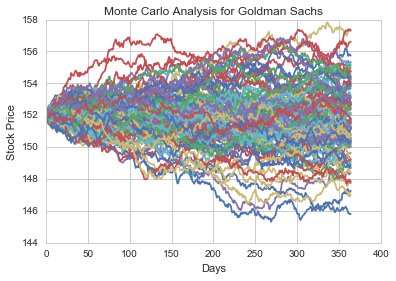

In [59]:
start_price = 152

for run in range(100) :
    plt.plot(monte_carlo(start_price, days, mu, sigma ))
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Monte Carlo Analysis for GS')
plt.show()

In [61]:
runs = 10000
sims = np.zeros(runs)
for run in range(runs):
    sims[run] = monte_carlo(start_price, days, mu, sigma)[days - 1]
    

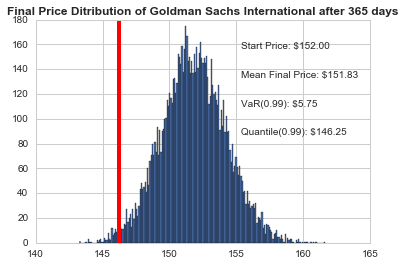

In [67]:
q = np.percentile(sims,1)
plt.hist(sims, bins = 200)
#Some info
plt.figtext(0.6,0.8, s= 'Start Price: $%.2f' %start_price)
plt.figtext(0.6,0.7, s= 'Mean Final Price: $%.2f' %sims.mean())
plt.figtext(0.6,0.6, s= 'VaR(0.99): $%.2f' %(start_price -q))
plt.figtext(0.6,0.5, s= 'Quantile(0.99): $%.2f' %float(q))
            
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final Price Ditribution after %s days" %(days), weight='bold')